In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import seaborn as sns
%matplotlib inline

# Monitored covid19 cases in Italy

## Data exploration

In [2]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

We can use the plot() method to see a quick plot of these (note that because we used the %matplotlib inline magic at the start of the notebook, the resulting plot will be shown inline within the notebook).

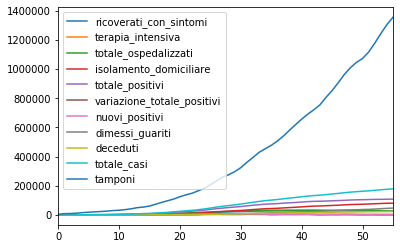

In [4]:
df.plot();

In [7]:
df.head(10)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN
5,2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,NaN,NaN
6,2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,NaN,NaN
7,2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,NaN,NaN
8,2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN,NaN
9,2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,107,3089,29837,NaN,NaN


In [9]:
df.tail(15)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
41,2020-04-05T17:00:00,ITA,28949,3977,32926,58320,91246,2972,4316,21815,15887,128948,691461,NaN,NaN
42,2020-04-06T17:00:00,ITA,28976,3898,32874,60313,93187,1941,3599,22837,16523,132547,721732,NaN,NaN
43,2020-04-07T17:00:00,ITA,28718,3792,32510,61557,94067,880,3039,24392,17127,135586,755445,NaN,NaN
44,2020-04-08T17:00:00,ITA,28485,3693,32178,63084,95262,1195,3836,26491,17669,139422,807125,NaN,NaN
45,2020-04-09T17:00:00,ITA,28399,3605,32004,64873,96877,1615,4204,28470,18279,143626,853369,NaN,NaN
46,2020-04-10T17:00:00,ITA,28242,3497,31739,66534,98273,1396,3951,30455,18849,147577,906864,pd-IT-0011,pd-EN-0011
47,2020-04-11T17:00:00,ITA,28144,3381,31525,68744,100269,1996,4694,32534,19468,152271,963473,NaN,NaN
48,2020-04-12T17:00:00,ITA,27847,3343,31190,71063,102253,1984,4092,34211,19899,156363,1010193,dc-IT-0003,dc-EN-0003
49,2020-04-13T17:00:00,ITA,28023,3260,31283,72333,103616,1363,3153,35435,20465,159516,1046910,NaN,NaN
50,2020-04-14T17:00:00,ITA,28011,3186,31197,73094,104291,675,2972,37130,21067,162488,1073689,NaN,NaN


In [11]:
df.isnull().sum()

data                           0
stato                          0
ricoverati_con_sintomi         0
terapia_intensiva              0
totale_ospedalizzati           0
isolamento_domiciliare         0
totale_positivi                0
variazione_totale_positivi     0
nuovi_positivi                 0
dimessi_guariti                0
deceduti                       0
totale_casi                    0
tamponi                        0
note_it                       45
note_en                       45
dtype: int64

<div class="alert alert-success">
    <b>EXERCISE</b>: Check if 'nan' are present
</div>

In [12]:
df.describe()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01
mean,16532.642857,2283.107143,18815.767857,31202.267857,50018.017857,1929.214286,3195.785714,13034.303571,8436.696429,71489.017857,4.146558e+05
std,11508.946331,1474.520565,12953.883717,28622.046785,40654.970942,1399.240738,1897.793204,14370.482427,8282.053059,62531.388434,4.107920e+05
min,101.000000,26.000000,127.000000,94.000000,221.000000,0.000000,78.000000,1.000000,7.000000,229.000000,4.324000e+03
25%,4126.250000,712.250000,4838.500000,2494.250000,7585.500000,612.500000,1430.750000,698.500000,438.750000,8722.750000,5.285375e+04
50%,20269.000000,2772.500000,23375.500000,25152.500000,48528.000000,1794.500000,3511.500000,7228.000000,5776.500000,61532.500000,2.669350e+05
75%,27888.000000,3606.750000,31285.250000,58818.250000,91731.250000,2898.750000,4674.500000,22070.500000,16046.000000,129847.750000,6.990288e+05
max,29010.000000,4068.000000,33004.000000,80589.000000,108257.000000,4821.000000,6557.000000,47055.000000,23660.000000,178972.000000,1.356541e+06


In [ ]:
df.info()

<div class="alert alert-success">
    <b>EXERCISE</b>: Check if 'stato' has only ITA as description
</div>

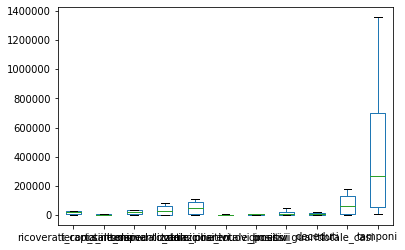

In [13]:
df.plot(kind='box');

In [14]:
df.columns

Index(['data', 'stato', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'note_it', 'note_en'],
      dtype='object')

In [ ]:
df['variazione_totale_positivi'].plot(kind='hist', bins=10)#, logy=True)

## Index operation

Let's now check the date format

In [16]:
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN


In [15]:
df['data']

0     2020-02-24T18:00:00
1     2020-02-25T18:00:00
2     2020-02-26T18:00:00
3     2020-02-27T18:00:00
4     2020-02-28T18:00:00
5     2020-02-29T18:00:00
6     2020-03-01T18:00:00
7     2020-03-02T18:00:00
8     2020-03-03T18:00:00
9     2020-03-04T18:00:00
10    2020-03-05T18:00:00
11    2020-03-06T18:00:00
12    2020-03-07T18:00:00
13    2020-03-08T18:00:00
14    2020-03-09T18:00:00
15    2020-03-10T18:00:00
16    2020-03-11T17:00:00
17    2020-03-12T17:00:00
18    2020-03-13T17:00:00
19    2020-03-14T17:00:00
20    2020-03-15T17:00:00
21    2020-03-16T17:00:00
22    2020-03-17T17:00:00
23    2020-03-18T17:00:00
24    2020-03-19T17:00:00
25    2020-03-20T17:00:00
26    2020-03-21T17:00:00
27    2020-03-22T17:00:00
28    2020-03-23T17:00:00
29    2020-03-24T17:00:00
30    2020-03-25T17:00:00
31    2020-03-26T17:00:00
32    2020-03-27T17:00:00
33    2020-03-28T17:00:00
34    2020-03-29T17:00:00
35    2020-03-30T17:00:00
36    2020-03-31T17:00:00
37    2020-04-01T17:00:00
38    2020-0

In [18]:
df['data'] = pd.to_datetime(df['data'])

In [20]:
df['data']

0    2020-02-24 18:00:00
1    2020-02-25 18:00:00
2    2020-02-26 18:00:00
3    2020-02-27 18:00:00
4    2020-02-28 18:00:00
5    2020-02-29 18:00:00
6    2020-03-01 18:00:00
7    2020-03-02 18:00:00
8    2020-03-03 18:00:00
9    2020-03-04 18:00:00
10   2020-03-05 18:00:00
11   2020-03-06 18:00:00
12   2020-03-07 18:00:00
13   2020-03-08 18:00:00
14   2020-03-09 18:00:00
15   2020-03-10 18:00:00
16   2020-03-11 17:00:00
17   2020-03-12 17:00:00
18   2020-03-13 17:00:00
19   2020-03-14 17:00:00
20   2020-03-15 17:00:00
21   2020-03-16 17:00:00
22   2020-03-17 17:00:00
23   2020-03-18 17:00:00
24   2020-03-19 17:00:00
25   2020-03-20 17:00:00
26   2020-03-21 17:00:00
27   2020-03-22 17:00:00
28   2020-03-23 17:00:00
29   2020-03-24 17:00:00
30   2020-03-25 17:00:00
31   2020-03-26 17:00:00
32   2020-03-27 17:00:00
33   2020-03-28 17:00:00
34   2020-03-29 17:00:00
35   2020-03-30 17:00:00
36   2020-03-31 17:00:00
37   2020-04-01 17:00:00
38   2020-04-02 17:00:00
39   2020-04-03 17:00:00


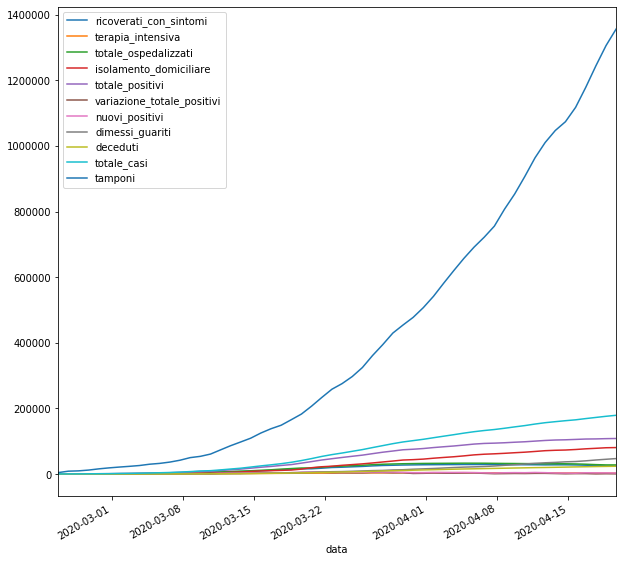

In [21]:
df.set_index('data').plot(figsize=(10,10));

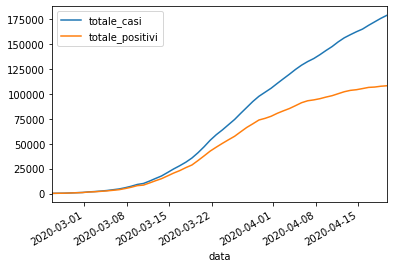

In [22]:
df.set_index('data')[['totale_casi', 'totale_positivi']].plot();

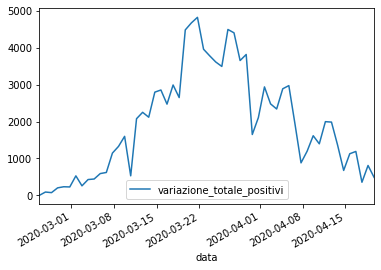

In [23]:
df.set_index('data')[['variazione_totale_positivi']].plot();

In [24]:
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
1,2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2,2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
3,2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
4,2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN


In [25]:
df = df.set_index('data')

In [26]:
df

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
data,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
2020-02-25 18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2020-02-26 18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
2020-02-27 18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
2020-02-28 18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN
2020-02-29 18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,NaN,NaN
2020-03-01 18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,NaN,NaN
2020-03-02 18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,NaN,NaN
2020-03-03 18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN,NaN


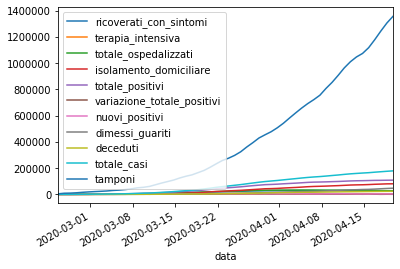

In [27]:
df.plot()

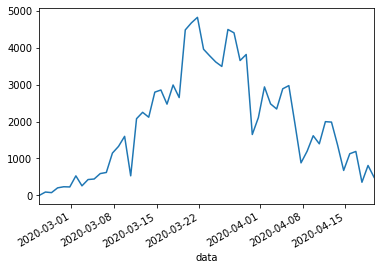

In [28]:
df['variazione_totale_positivi'].plot();

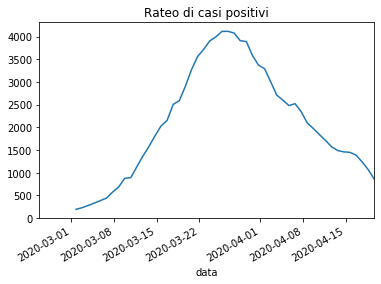

In [33]:
df['variazione_totale_positivi'].rolling(7).mean().plot(title="Rateo di casi positivi");

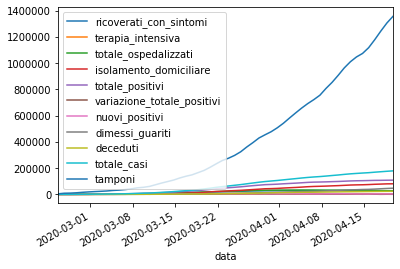

In [48]:
df["2020"].plot()

In [51]:
df['ratio'] = df['totale_casi'] / df['tamponi']

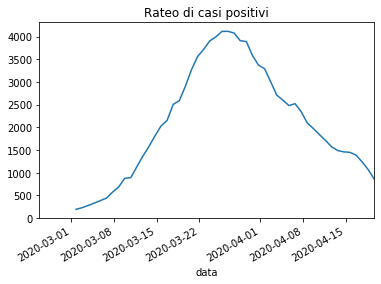

In [56]:
df['variazione_totale_positivi'].rolling(7).mean().plot(title="Rateo di casi positivi");

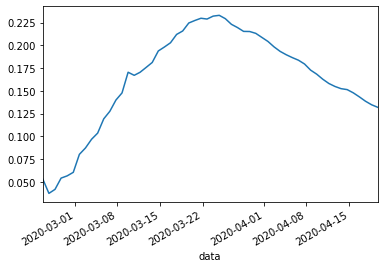

In [55]:
df['ratio'].plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the total cases between Feb 15th and March 15th
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: And now only the data from February
</div>

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from minutely to hourly data).

The time series has a frequency of 15 min. I want to change this to daily:

In [ ]:
df.index.hour

In [ ]:
df.index.dayofyear

In [ ]:
df.resample('W').mean()

In [ ]:
df['totale_casi'].resample('M').mean().plot()
df['totale_casi'].resample('M').median().plot();

<div class="alert alert-success">
    <b>EXERCISE</b>: make a <b>bar</b> plot of the mean of the columns for March
</div>

# covid19 cases around the globe (in the next episode)